## Homework 2

#### Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/  (7.5 points)

##### Answer the following questions with the help of  one or more visualizations  per  question  (2.5 for each question)
1. Which pair of variables are highly correlated (leave out the class label - first column)?
2. Are there any pair of variables that have a non-linear relationship? 
3. When comparing wine cultivar type 1,2, and 3, Do any of the type(s) have datapoints with high hue and low color intensity?


#### Dataset:  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/   (7.5 points)

##### Answer the following questions with the help of  one or more visualizations  per  question
1. Are there certain combinations of make and body-styles that have high city-mpg? **(3.5)**
2. When looking at cars with the disel and gas fuel-types, do either of these fuel types have cars with high highway-mpg and high price? Approximately, which fuel-type has more cars in the of high highway-mpg and high price region? Among those cars what is the lowest num-of-cylinders value? **(4)**

**Note:**
1. Normalize data if required
2. Missing values can be filled in with any technique you learnt in your Data Mining courses

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import parallel_coordinates
from pandas.plotting import parallel_coordinates
from sklearn import datasets
from word2number import w2n

### Part - 1 Data Loading


In [2]:
names = ['classes','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names = names)
data = data.drop(['classes'],axis = 1)

### Question 1 Which pair of variables are highly correlated (leave out the class label - first column)?

### Answer: 
* From the below Heatmap we can see that correlation values for Flavanoids and Total Phenols are highest which is 0.86 
* "Total Phenols and Flavanoids" are highly correlated

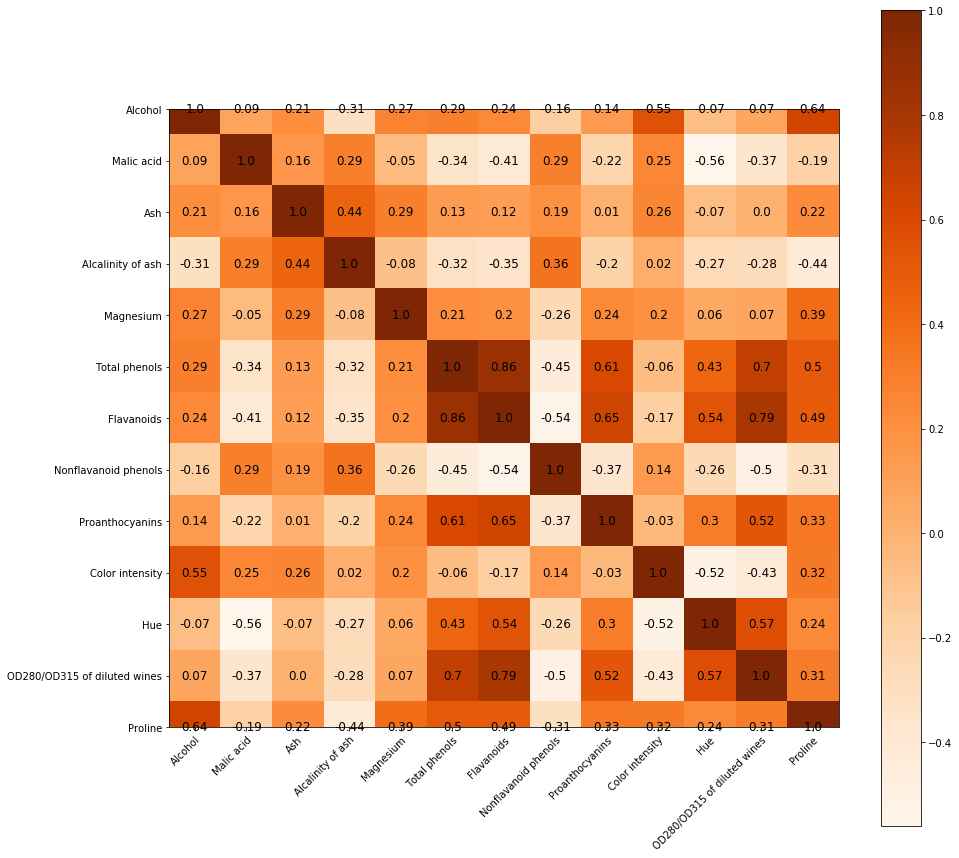

In [3]:
corr = np.array(data.corr('pearson'))
corr = np.round(corr, 2)
attributes = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
         "Total phenols", "Flavanoids", "Nonflavanoid phenols", 
         "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

fig, ax = plt.subplots()
im = ax.imshow(corr, cmap = "Oranges")

ax.set_xticks(np.arange(len(attributes)))
ax.set_yticks(np.arange(len(attributes)))

ax.set_xticklabels(attributes)
ax.set_yticklabels(attributes)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")

for i in range(len(attributes)):
    for j in range(len(attributes)):
        text = ax.text(j, i, corr[i, j],
                       ha="center", va="center", color="black", fontsize = 12)
        
fig.set_size_inches(15, 15)
fig.colorbar(im)


### Question 2 Are there any pair of variables that have a non-linear relationship ?

### Answer: From the  Individual scatter plots:

1. Flavanoids and Proline
2. Total Phenols and Proline
3. Malic Acid and Proline
4. color Intensity and Flavanoids

These pairs have non linear relationship 


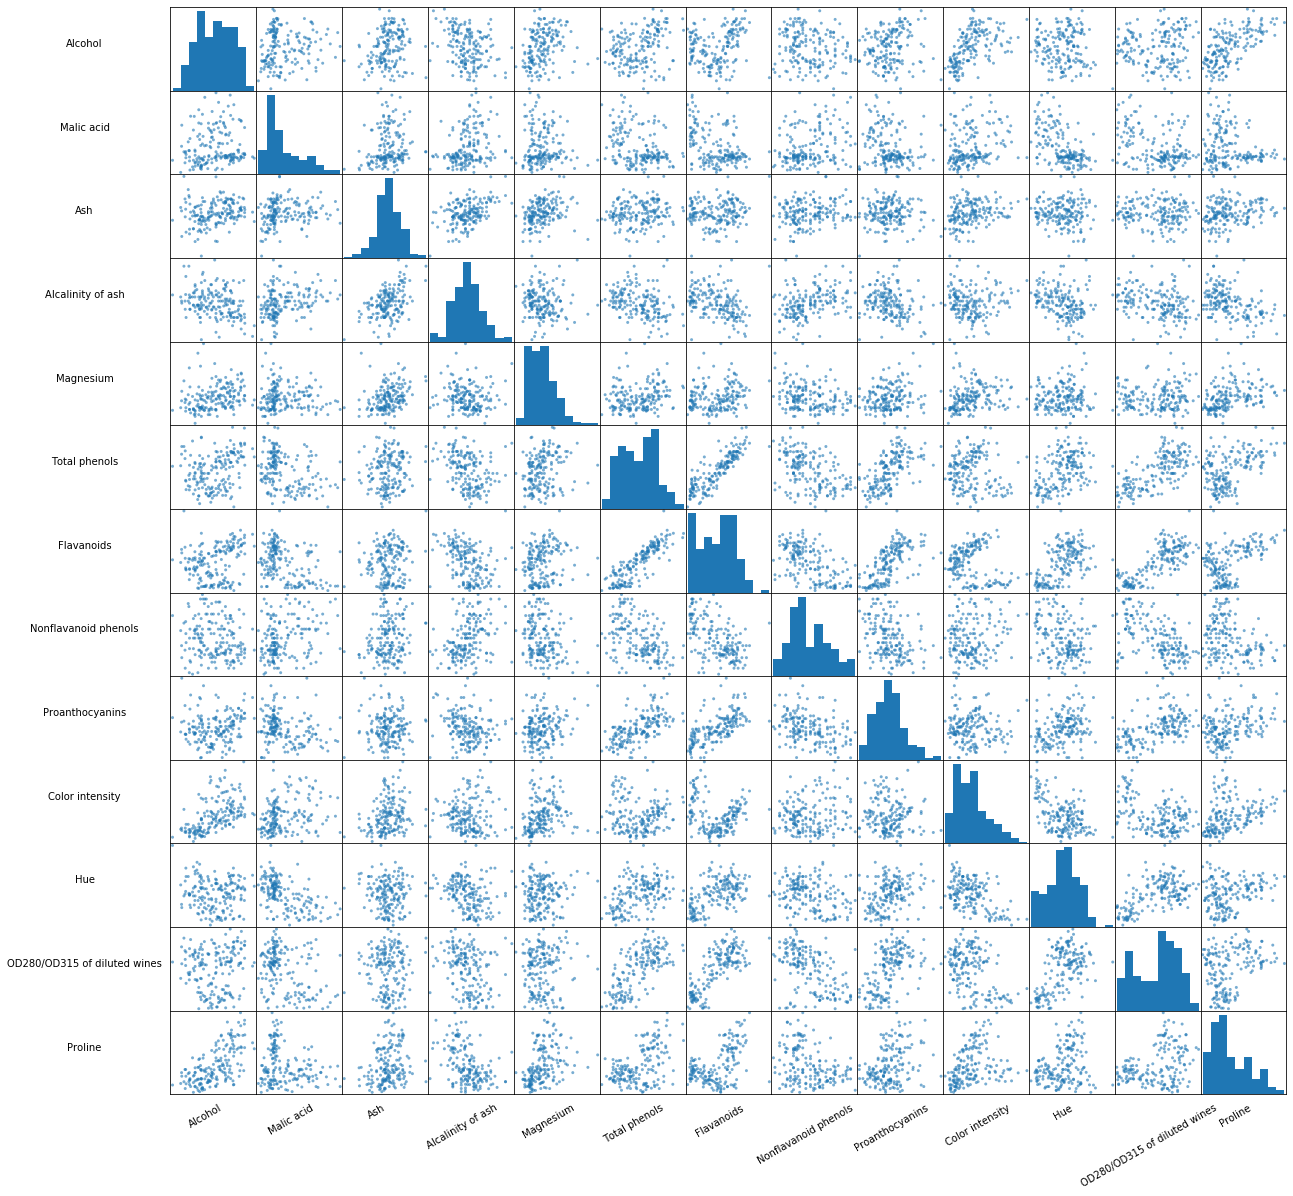

In [4]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data, alpha=0.6, figsize=(20,20), diagonal='hist')
[s.xaxis.label.set_rotation(30) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-1.0,0.5) for s in sm.reshape(-1)]
[s.get_xaxis().set_label_coords(0.4,-0.1) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

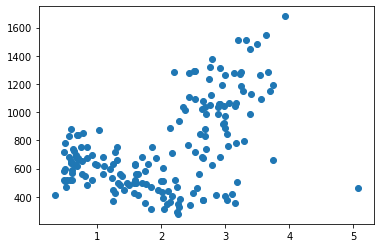

In [5]:
plt.scatter(data['Flavanoids'],data["Proline"])

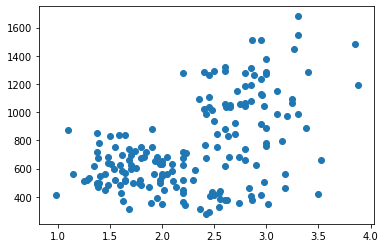

In [6]:
plt.scatter(data['Total phenols'],data["Proline"])

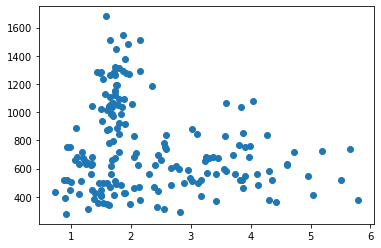

In [7]:
plt.scatter(data['Malic acid'],data["Proline"])

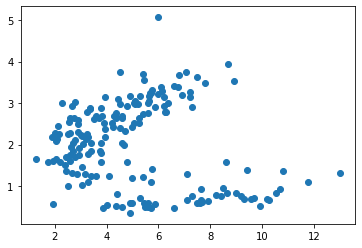

In [8]:
plt.scatter(data['Color intensity'],data["Flavanoids"])

### Question 3: When comparing wine cultivar type 1,2, and 3, Do any of the type(s) have datapoints with high hue and low color intensity?¶

### Answer: 
* From the below scatter plot we can see that :
* cultivar type 2 have datapoints with high hue and low color intensity.
* the black color shows the type 2 class on the plot
* the lower right corner shows a point in scatter plot where hue is greater than 1.7 and color intenisty is 2

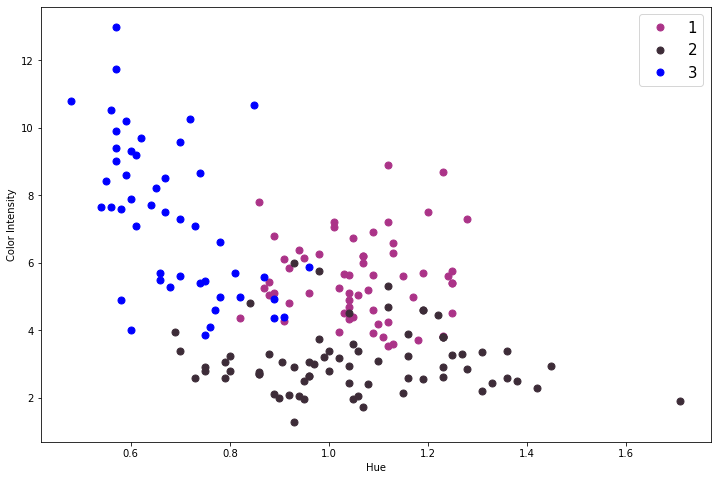

In [9]:
names = ['classes','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','diluted wines','Proline']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',names = names)
groups = df.groupby('classes')
fig, ax = plt.subplots(figsize = (12,8))
colors = ["#AB3388","#3D2C38","blue"]
m = 0
for i ,group in groups:
    ax.plot(group['Hue'],group['Color intensity'],marker = 'o', markersize = 7, linestyle = '', label = i,c = colors[m])
    m = m+1
#plt.xticks(rotation = 45)
plt.xlabel('Hue')
plt.ylabel('Color Intensity')
ax.legend(loc = 1,prop = {'size':15})
plt.show()


### part - 2 Data Loading

In [10]:
attributes = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location', 
            'wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke', 
            'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto_data = pd.read_csv('imports-85.data',names = attributes)

### Data cleaning and Handling missing values

In [11]:
auto_data.replace({'?' : 0}, inplace = True)
auto_data = auto_data.fillna(auto_data.mode().iloc[0])
auto_data['price'] = auto_data['price'].astype('int64')


### Question 1: Are there certain combinations of make and body-styles that have high city-mpg? 

### Answer: 
1. body-style : hatchback and make : Honda has high value of city-MPG
2. It can be seen from the plot that the value is close to 49 on y-axis and honda is on x-axis of the scatter plot




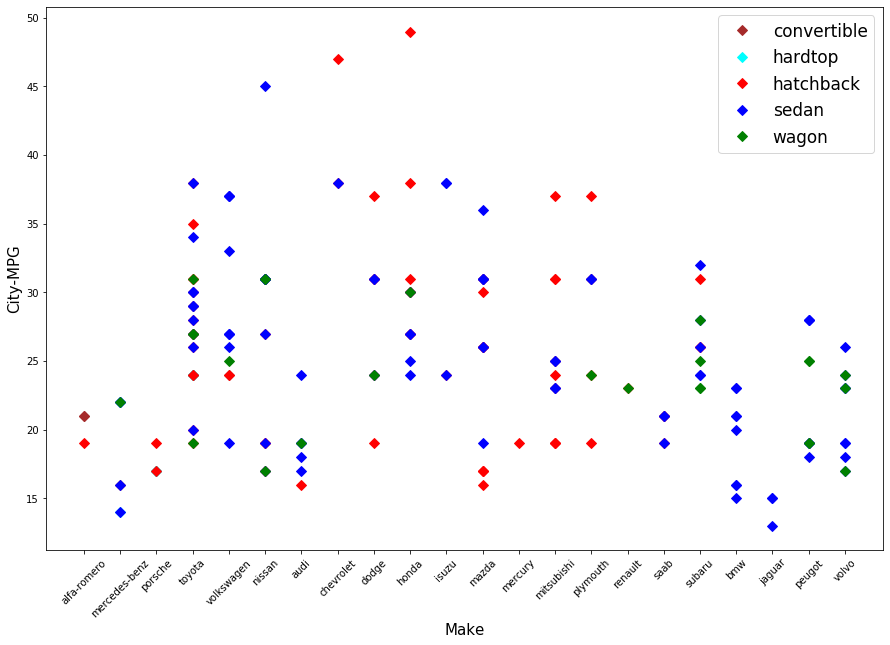

In [12]:
groups = auto_data.groupby('body-style')
fig, ax = plt.subplots(figsize = (15,10))
color = ["brown","cyan","red","blue","green"]
m = 0
for i, group in groups:
    ax.plot(group['make'], group['city-mpg'], marker = "D", markersize = 7, linestyle = '', label = i,c= color[m])
    m += 1
plt.xticks(rotation = 45,fontsize = 10)
plt.xlabel('Make',fontsize = 15)
plt.ylabel('City-MPG',fontsize = 15)
ax.legend(loc = 1,prop = {'size':17})
plt.show()

### Question 2 : When looking at cars with the disel and gas fuel-types, do either of these fuel types have cars with high highway-mpg and high price? Approximately, which fuel-type has more cars in the of high highway-mpg and high price region? Among those cars what is the lowest num-of-cylinders value?

In [28]:
df_temp = auto_data[['price','highway-mpg']]
list_cylinder = auto_data['num-of-cylinders'].to_numpy()
list_number = []
for i in range(0,205):
    list_number.append(w2n.word_to_num(list_cylinder[i]))
c = auto_data["fuel-type"]
li = []
for key, val in enumerate(c):
    if val == "gas":
        li.append(1)
    else:
        li.append(0)
df_temp['fuel-type'] = li
df_temp["num-of-cylinders"] = list_number
df_temp

/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/macbookpro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


price  highway-mpg  fuel-type  num-of-cylinders
0    13495           27          1                 4
1    16500           27          1                 4
2    16500           26          1                 6
3    13950           30          1                 4
4    17450           22          1                 5
..     ...          ...        ...               ...
200  16845           28          1                 4
201  19045           25          1                 4
202  21485           23          1                 6
203  22470           27          0                 6
204  22625           25          1                 4

[205 rows x 4 columns]

### 4 Dimensional Scatter Plot

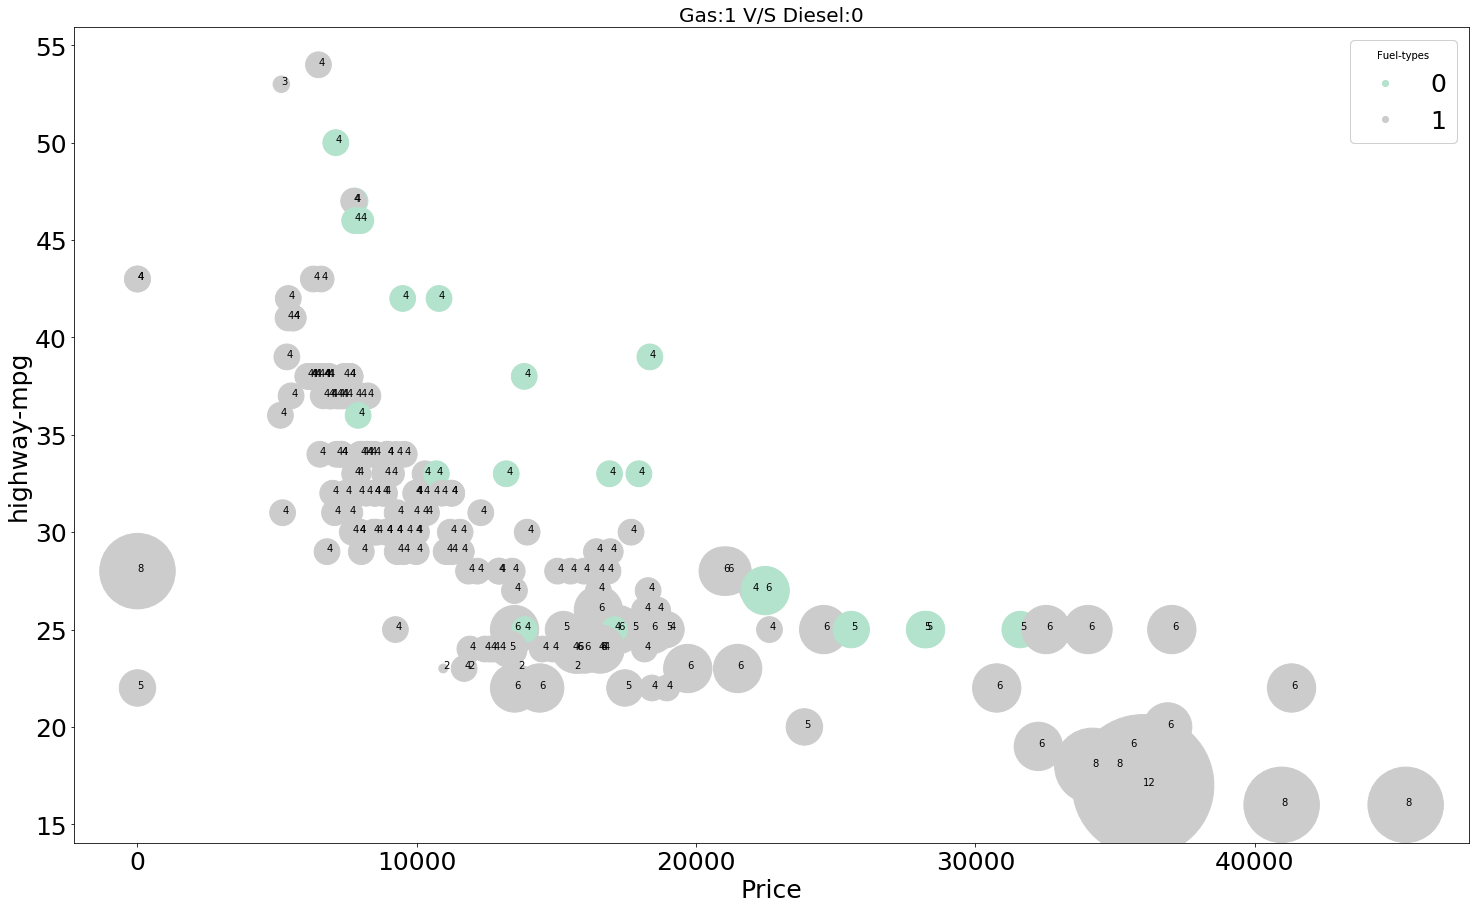

In [29]:
volume = df_temp["price"]
amount = df_temp["highway-mpg"]
ranking =df_temp["fuel-type"]
price = df_temp["num-of-cylinders"]
fig, ax = plt.subplots(figsize = (25,15))

scatter = ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**3.1,cmap = "Pastel2")

legend1 = ax.legend(*scatter.legend_elements(num=1),
                    loc="upper right", title="Fuel-types",prop = {'size':25})
ax.add_artist(legend1)
ax.set_title("Gas:1 V/S Diesel:0",fontsize = 20)

plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25)
plt.xlabel("Price",fontsize = 25)
plt.ylabel("highway-mpg",fontsize = 25)
for i, txt in enumerate(price):
    ax.annotate(txt, (volume[i], amount[i]))

### Parallel Coordinate Plot

In [30]:
import plotly.express as px
fig = px.parallel_coordinates(df_temp, color="fuel-type", labels={"fuel-type": "fuel-type",
                "highway-mpg": "highway-mpg", "price": "price",
                "num-of-cylinders": "num-of-cylinders"},)

fig.show()

## Answer

### Parallel coordinate Explanation:

* In Parallel coordinate chart , we can see that blue color lines corresponds to 0 fuel type which is decoded as diesel.
* The data is converted into int 64 type so as to make a parallel plot
* The region which is relatively high price and high mpg belongs to diesel cars and among those cars number of cylinders is 4.
* It can be seen from the plot that blue lines reaching towards number of cylinders = 4 in the last column of parallel coordinates shows the cars with relatively high-mpg and price.


###  4 Dimensional Scatter plot Explanation: 

* X axis : price
* Y axis : highway-mpg
* color : fuel-types { gas:1,diesel:0}
* size of bubble : num-of-cylinders

By making bubble chart of four variables it is clear that the cars which have relatively high price and highway-mpg are mostly of diesel fuel type. whereas, the least number of cylinders among those cars are four cylinder.
Note: taking diesel as 0 and gas as 1